In [1]:
import numpy as np
import matplotlib.pyplot as plt
import hartreeclass as ht # import our library

In [2]:
# System parameters
# ----------------------------------------
nt = 8 # [10¹¹ cm⁻²]
ndop = nt/2 # [10¹¹ cm⁻²] half of nt to keep system neutral
Lc = 30 # nm central well width [nm]
Ls = 5 # nm side barrier up to delta-doping region
Ld = 5 # nm buffer after the delta-doing
cbars = [-5, 5] # nm center of two barriers
# ----------------------------------------

# create model
Nz = 200 # number of points
model = ht.hartree(nt=nt, ndop=ndop, Nz=Nz, Lc=Lc, Ls=Ls, Ld=Ld, Lb=2, cbars=cbars)

In [3]:
# run with fixed density and electric field eF=+2
# subbands=2 tells the code to calculate SOC and dens for at least 2 subbands
z, v0, vh, vg, evals, evecs, mu, its, rashba, dress1, dress3, dens = model.runHartree(eF=2, fixmu=None, mix=0.5, subbands=2)

# print some results
print('-------------------------------')
print('number of iterations until convergence:', its)
print('-------------------------------')
print('subband energies [meV]:')
# choosing zero energy at mu
print('    1st subband: ', evals[0] - mu)
print('    2nd subband: ', evals[1] - mu)
print('    3rd subband: ', evals[2] - mu)
print('   Fermi energy: ', mu - mu)
print('-------------------------------')
print('subband densities [cm⁻²]:')
print('    1st subband: ', 1e3*dens[0])
print('    2nd subband: ', 1e3*dens[1])
print('-------------------------------')
print('Rashba SOC [meV nm]')
print('    1st subband: ', rashba[0,0])
print('    2nd subband: ', rashba[1,1])
print('  inter-subband: ', rashba[0,1])
print('-------------------------------')
print('Linear Dresselhaus SOC [meV nm]')
print('    1st subband: ', dress1[0,0])
print('    2nd subband: ', dress1[1,1])
print('  inter-subband: ', dress1[0,1])
print('-------------------------------')
print('Cubic Dresselhaus SOC [meV nm]')
print('    1st subband: ', dress3[0])
print('    2nd subband: ', dress3[1])
print('-------------------------------')

-------------------------------
number of iterations until convergence: 34
-------------------------------
subband energies [meV]:
    1st subband:  -21.266077996170566
    2nd subband:  -7.317588821454706
    3rd subband:  5.746738216721582
   Fermi energy:  0.0
-------------------------------
subband densities [cm⁻²]:
    1st subband:  5.9519523878741785
    2nd subband:  2.0480476121258278
-------------------------------
Rashba SOC [meV nm]
    1st subband:  0.4068976805563859
    2nd subband:  -0.07646709939348588
  inter-subband:  0.05685010260332819
-------------------------------
Linear Dresselhaus SOC [meV nm]
    1st subband:  0.5176237522306563
    2nd subband:  0.4775316764173001
  inter-subband:  0.06642092281954066
-------------------------------
Cubic Dresselhaus SOC [meV nm]
    1st subband:  0.10284235442943959
    2nd subband:  0.0353877223285114
-------------------------------


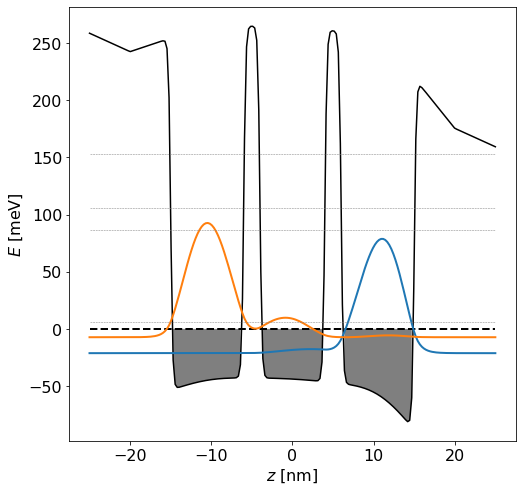

In [4]:
# PLOT WELL AND ENVELOPE FUNCTIONS OVER EACH SUBBAND ENERGY
fig = plt.figure(1, figsize=(8,8))
plt.rcParams.update({'font.size': 16})
plt.clf()

y1 = v0+vh+vg-mu
y2 = 0*np.ones(len(z))
plt.plot(z, y1, c='black') # potential
# fill potential below Fermi energy:
plt.fill_between(z, y1, y2, fc='black', alpha=0.5, where=y2>y1)
plt.hlines(0, z[0], z[-1], colors='black', ls='--', lw=2)
# envelope functions
dE = 100 # scale for psi**2 translated to energy
plt.plot(z, evals[0]-mu + dE*evecs[:,0]**2/np.max(evecs[:,0]**2), c='C0', lw=2)
plt.plot(z, evals[1]-mu + dE*evecs[:,1]**2/np.max(evecs[:,1]**2), c='C1', lw=2)
for i in range(2, 6):
    plt.plot(z, (evals[i]-mu)*np.ones(len(z)), c='gray', lw=0.5, ls='--')
plt.xlabel(R'$z$ [nm]')
plt.ylabel(R'$E$ [meV]')
plt.show()